<a href="https://colab.research.google.com/github/durai200206murugan/NM-Project/blob/main/nm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q matplotlib seaborn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# For real application, replace this with your own image dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:

# For simulation, let's assume:
# 0 (airplane), 1 (automobile) = "Good"
# 2 (bird), 3 (cat) = "Defective"
# Everything else = ignore

def filter_dataset(X, y):
    filtered_idx = np.where(np.isin(y, [0, 1, 2, 3]))[0]
    X = X[filtered_idx]
    y = y[filtered_idx]
    y_binary = np.where(np.isin(y, [2, 3]), 1, 0)  # 1 = Defective, 0 = Good
    return X, y_binary

x_train_filtered, y_train_binary = filter_dataset(x_train, y_train)
x_test_filtered, y_test_binary = filter_dataset(x_test, y_test)

# Normalize data
x_train_filtered = x_train_filtered / 255.0
x_test_filtered = x_test_filtered / 255.0

print(f"Training samples: {x_train_filtered.shape[0]}, Test samples: {x_test_filtered.shape[0]}")


Training samples: 20000, Test samples: 4000


In [ ]:

# Section 4: Define CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary output: Good (0), Defective (1)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Section 5: Train the Model
history = model.fit(x_train_filtered, y_train_binary, epochs=5,
                    validation_data=(x_test_filtered, y_test_binary))



Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.7846 - loss: 0.4528 - val_accuracy: 0.8857 - val_loss: 0.2829
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 48ms/step - accuracy: 0.8863 - loss: 0.2765 - val_accuracy: 0.8970 - val_loss: 0.2464
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.8979 - loss: 0.2480 - val_accuracy: 0.8955 - val_loss: 0.2504
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.9076 - loss: 0.2252 - val_accuracy: 0.9082 - val_loss: 0.2215
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.9129 - loss: 0.2093 - val_accuracy: 0.9050 - val_loss: 0.2297


In [ ]:
# Section 6: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test_filtered, y_test_binary, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")


125/125 - 2s - 12ms/step - accuracy: 0.9050 - loss: 0.2297

Test accuracy: 0.90


In [ ]:

# Section 7: Classification Report
y_pred = (model.predict(x_test_filtered) > 0.5).astype("int32")
print(classification_report(y_test_binary, y_pred, target_names=["Good", "Defective"]))


125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
              precision    recall  f1-score   support

        Good       0.88      0.93      0.91      2000
   Defective       0.93      0.88      0.90      2000

    accuracy                           0.91      4000
   macro avg       0.91      0.91      0.90      4000
weighted avg       0.91      0.91      0.90      4000



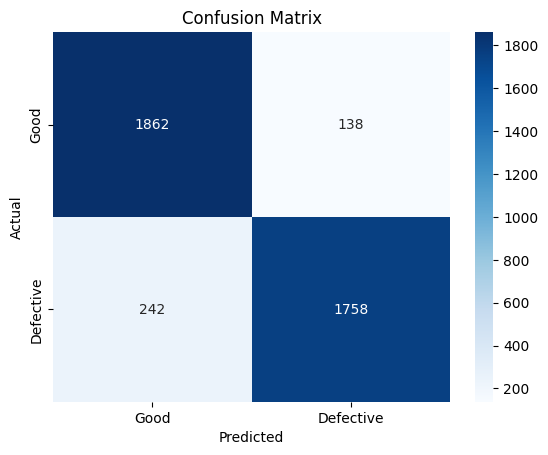

In [ ]:

# Section 8: Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Good", "Defective"], yticklabels=["Good", "Defective"])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


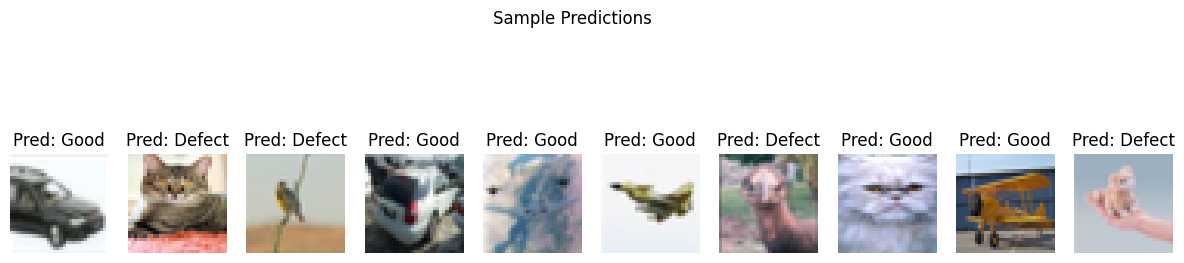

In [ ]:

# Section 9: Sample Predictions Visualization
def show_samples(X, y_true, y_pred, n=10):
    plt.figure(figsize=(15, 4))
    for i in range(n):
        idx = np.random.randint(0, len(X))
        plt.subplot(1, n, i+1)
        plt.imshow(X[idx])
        plt.title(f"Pred: {'Defect' if y_pred[idx] else 'Good'}")
        plt.axis('off')
    plt.suptitle("Sample Predictions")
    plt.show()

show_samples(x_test_filtered, y_test_binary, y_pred.flatten())